<center><h1><b>Lecture 2</b></h1></center>
<center><h1><b>Random Walks and Stochastic Programs</b></h1></center>

<center><h4>Time: T2 (09:00 ~ 09:50) and W34 (10:10 ~ 12:00)</h4></center>

<center><h2>Chieh-En Lee<sup>1</sup> (李杰恩) and Chung-Hao Tien<sup>2</sup> (田仲豪)</h2></center>

<center>
<h4>{<a href="mailto:celee@nycu.edu.tw">celee</a><sup>1</sup>, 
<a href="mailto:chtien@nycu.edu.tw">chtien</a><sup>2</sup>}@nycu.edu.tw</h4>
</center>

<center><h3><a href="https://dop.nycu.edu.tw/ch/index.html">Department of Photonics</a>, <a href="https://www.nycu.edu.tw/">NYCU</a></h3></center>

<br />
<center><h5><a href="https://github.com/bruce88617/nycudopcs_advanced">Data Science and Python Programming</a>, 2025 Spring</h5></center>


## Last Time

- Knapsack problems
- The 0/1 knapsack problems
- Dynamic programming
- Graph theory
- Graph optimization problems
- Breadth-first search
- Depth-first search
- Dijkstra algorithm

## **Today**

<ul>
  <li>
    Part I: Random Walk
    <ul>
      <li><a href="#tag1">The drunkard's walk</a></li>
      <li><a href="#tag2">Biased random walks</a></li>
      <li><a href="#tag3">Treacherous fields</a></li>
    </ul>
  </li>

  <li>
    Part II: Stochastic Programs
    <ul>
      <li><a href="#tag4">The concept of random variables</a></li>
      <li><a href="#tag5">Distributions</a></li>
        For discrete random variables
        <ul>
          <li><a href="#tag6">Bernoulli distribution</a></li>
          <li><a href="#tag7">Geometric distribution</a></li>
          <li><a href="#tag8">Binomial distribution</a></li>
          <li><a href="#tag9">Pascal distribution</a></li>
          <li><a href="#tag10">Poisson distribution</a></li>
        </ul>
        For continuous random variables
        <ul>
          <li><a href="#tag11">Uniform distribution</a></li>
          <li><a href="#tag12">Exponential distribution</a></li>
          <li><a href="#tag13">Normal distribution</a></li>
          <li><a href="#tag14">Gamma distribution</a></li>
        </ul>
    </ul>
  </li>
  
</ul>


## **Random Walks**

- In 1827, the Scottish botanist Robert Brown observed that pollen particles suspended in water seemed to float around at random.

- Random walks are widely used to model many different processes:

    * Physical processes (e.g., diffusion)
    
    * Biological processes (e.g., the kinetics of displacement of RNA from heteroduplexes by DNA)
    
    * Social processess (e.g., movements of the stock market)

- It provides us with a good example of how to use abstract data types and inheritance to structure programs in general and simulation models in particular.


<a id="tag1"></a>

## **The Drunkard's Walk**

- A drunkard is standing in the middle of a field.

- Every second the drunkard takes one step in a random direction.

- What is his/her expected distance from the origin in 1000 seconds?

- If he/she takes many steps, is he/she likely to move ever farther from the origin or not?

    <img align="center" height=auto width=200px src="./assets/fig01.png">



In [ ]:
import scripts.part1 as p1

p1.test1()

Run Test #1: Random Walk of Drunkard HoHoChen
    UsualDrunk random walk of 10 steps
        Mean = 2.682, Max = 5.1, Min = 0.0
    UsualDrunk random walk of 100 steps
        Mean = 9.394, Max = 23.0, Min = 0.0
    UsualDrunk random walk of 1000 steps
        Mean = 27.165, Max = 69.0, Min = 0.0
    UsualDrunk random walk of 10000 steps
        Mean = 86.864, Max = 190.2, Min = 8.2
==================== End of Test 1 ====================


Run Test #2: Random Walk of Drunkard YenYenChen


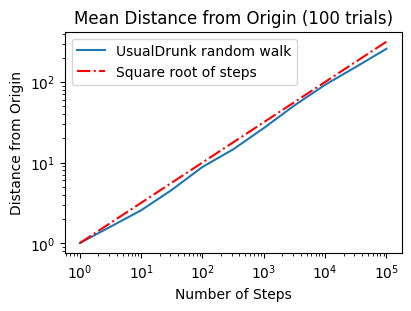

In [2]:
p1.test2()

<a id="tag2"></a>

## **Biased Random Walks**

- A drunkard with special behavior

- For example:

    * A drunkard in the southern hemisphere who hates the heat is able to move twice as fast when his random movements take him in a southward direction, even in his drunken stupor.

    * A TSMC employee who lives in the western coast of Taiwan wants to run away from his company. After drinking heavily, he is able to move twice as fast when his random movements take him in a eastward direction.

    * ...

    <img align="center" height=auto width=400px src="./assets/fig02.png">



In [3]:
p1.test3()

Run Test #3: Random Walk of Drunkard YingYingChen
    UsualDrunk random walk of 100 steps
        Mean = 8.323, Max = 20.0, Min = 0.0
    UsualDrunk random walk of 1000 steps
        Mean = 29.409, Max = 76.5, Min = 1.4
    HeatAvoidDrunk random walk of 100 steps
        Mean = 24.968, Max = 45.5, Min = 6.0
    HeatAvoidDrunk random walk of 1000 steps
        Mean = 250.315, Max = 338.0, Min = 178.9
    EastWardDrunk random walk of 100 steps
        Mean = 67.233, Max = 92.0, Min = 42.1
    EastWardDrunk random walk of 1000 steps
        Mean = 669.219, Max = 748.3, Min = 616.1
==================== End of Test 3 ====================


Run Test #4: Random Walk of Drunkard ChihChihChen


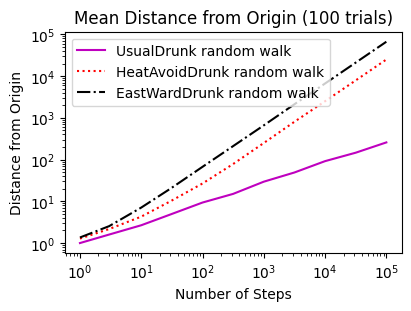

In [4]:
p1.test4()

Run Test #5: Where is the Drunkard Peter?


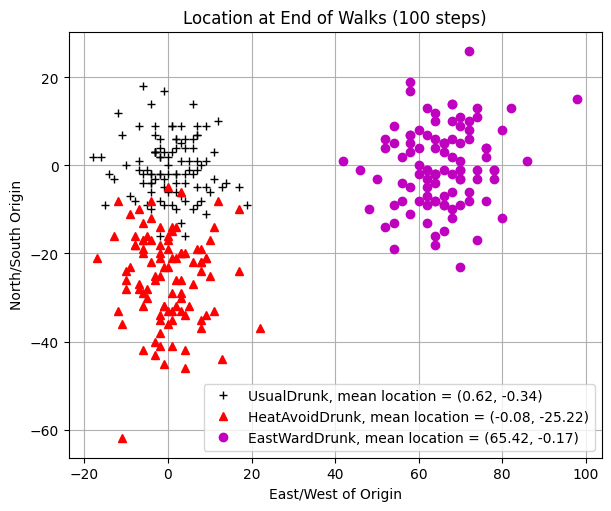

In [5]:
# Get the Final Location

p1.test5()

#### Iterator

- If you are not familiar with this, please refer [here](https://github.com/bruce88617/nycudopcs/blob/928926d9710ed209171dc26896906f12cb8acc45/Lectures/Lecture08/Lecture8.ipynb).

- Sample code:

    ```python
    class styleIterator:
        def __init__(self, styles):
            self.index = 0
            self.styles = styles
        
        def nextStyle(self):
            result = self.styles[self.index]
            if self.index == len(self.styles)-1:
                self.index = 0
            else:
                self.index += 1
            return result
    ```

Run Test #6: Trajectory of the Drunkard Peter


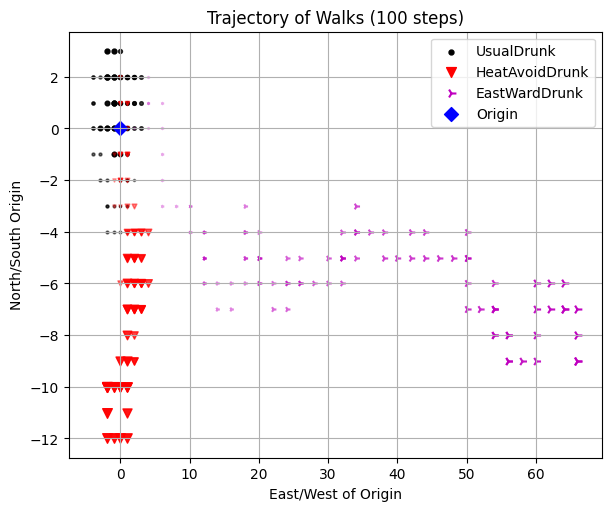

In [6]:
# The Trajectory of Walks

p1.test6()

<a id="tag3"></a>

## **Treacherous fields**

- A field with wormholes

- For example:

    <img align="center" height=auto width=300px src="./assets/fig03.png">


Run Test #7: Trajectory of Peter in a Mysterious Field


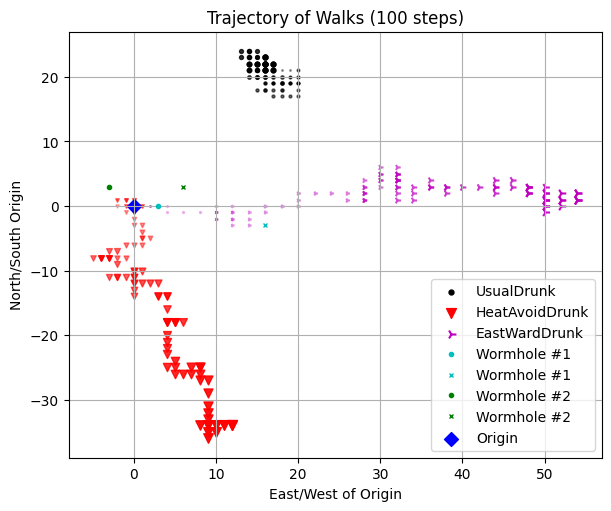

In [7]:
p1.test7()

- - -

## **Stochastic Programs**

- A program is __**deterministic**__ if whenever it is run on the same input, it produces the same output.

- If there is a program that is designed to simulate a dice game somewhere, it requires a __**stochastic**__ implementation, otherwise it is a boring game.

- Most programming languages, including Python, include simple ways to write stochastic programs, i.e., programs that exploit randomness.

- Typically, a random number or a series of random bits is created via **pseudo random number generator** (PRNG), which generates random number (or bit) based on an initial value called __**seed**__.

<img align="center" height=auto width=200px src="./assets/fig04.png">

#### Rolling a dice

In [8]:
from scripts.part2 import test1

# Random seed
test1()

# Fixed random see
test1(seed=True)

Rolling a fair dice 5 times
    1 trials: 36261
    2 trials: 43334
    3 trials: 65155
    4 trials: 14251
    5 trials: 32621
Rolling a fair dice 5 times
    1 trials: 44135
    2 trials: 44135
    3 trials: 44135
    4 trials: 44135
    5 trials: 44135


#### Flip Coins

- Suppose you are playing a coin flip game with Harvey Dent, and if heads comes up, Harvey wins. What is the probability that Harvey wins?

<img align="center" height=auto width=500px src="./assets/fig05.png">


In [26]:
from scripts.part2.utils import flipCoin

result = ""

for i in range(5):
    currentResult = flipCoin()
    print("{}: {}".format(i+1, currentResult))
    result += currentResult

print(result)

1: T
2: T
3: T
4: H
5: H
TTTHH


- We can use a systematic process to derive the precise probability of some complex event based on knowing the probability of one or more simpler events.

- However, we don’t actually know the exact probability of a event (we don’t know whether the dice is fair, for example).

- Fortunately, if we have some data about the behavior of the dice, we can combine that data with our knowledge of probability to derive an estimate of the true probability. This concept is called __**inferential statistics**__.

- Before we start to introduce the concept of __**inferential statistics**__, let's start with some fundamental mathematics.

<a id="tag4"></a>

## **The Concept of Random Variables**

- When analyzing a random experiment, we usually focus on certain numerical characteristics of the experiment. For example, in a baseball game, we might be interested in the number of runs, hits, home runs, strikeouts, and walks. If we consider the entire baseball game as a random experiment, then these numerical results provide information about the outcome of the experiment, and they are examples of random variables. In short, a random variable is a real-valued variable whose value is determined by an underlying random experiment.

- In essence, **a random variable is a real-valued function that assigns a numerical value to each possible outcome of the random experiment**. Taking the coin tossing example above, we can define the value of a random variable $X$ to be $0$ if the outcome is `"T"` and $1$ otherwise. Hence, the random variable $X$ is a function from the sample space $S = \{H, T\}$ to the real numbers $0$ and $1$.

$$
X: S \to \Reals
$$

- Since a random variable is a function that returns you a real value represented an event in the sample space, it means we will get different results if we measure it (different experiments). Therefore, we define $X_i$ as the $i^{th}$ measurement of the random variable $X$.

$$
\begin{aligned}
X_1 &= H \\
X_2 &= T \\
X_3 &= H \\
& \vdots \\
X_i &= H
\end{aligned}
$$

- This means that we can also define another random variable $Y$ to represent the summation of measurements $X_1 + X_2 + \cdots + X_i$. Taking an example of flipping a coin 5 times, we might be interested in how many heads we will have. In this case, the sample space $S$ becomes $\{ TTTTT, TTTTH, \cdots, HHHHH \}$. And the range of random variable $Y$, shown by $R_Y$, is the set of possible values for $Y = X_1 + X_2 + \cdots + X_5 = \{0, 1, 2, 3, 4, 5 \}$.

In [10]:
from scripts.part2.utils import flip

for i in range(5):
    numH, _ = flip(numFlips=5)
    print("Exp. {}: {}".format(i+1, numH))

Exp. 1: 4
Exp. 2: 3
Exp. 3: 1
Exp. 4: 1
Exp. 5: 4


### Probability Mass Function (PMF) & Probability Density Function (PDF)

- If $X$ is a **discrete random variable**, its range $R_X$ is a countable set, meaning we can enumerate its elements. In other words, we can express $R_X$ as $\{ x_1, x_2, x_3, ... \}$, where $x_1, x_2, x_3, ...$ represent possible values of $X$.

- For a discrete random variable $X$, we are particularly interested in the probabilities of $X = x_k$. Here, the event $A = \{ X = x_k \}$ consists of all outcomes $s$ in the sample space $S$ for which the corresponding value of $X = x_k$. More formally, this can be expressed as:

$$
A = \{ s \in S \mid X(s) = x_k \}
$$

- The probabilities of these events $P_X (x_k)$ are described by the **probability mass function (PMF)** of $X$.

$$
P_X (x_k) = P(X = x_k) \text{, for } k = 1, 2, 3, ...
$$

- If $X$ is a **continuous random variable**, then the probabilities of these events $f_X (x)$ are described by the **probability density function (PDF)** of $X$.

$$
f_X (x) = f(X = x) \text{, for } x \in \Reals
$$

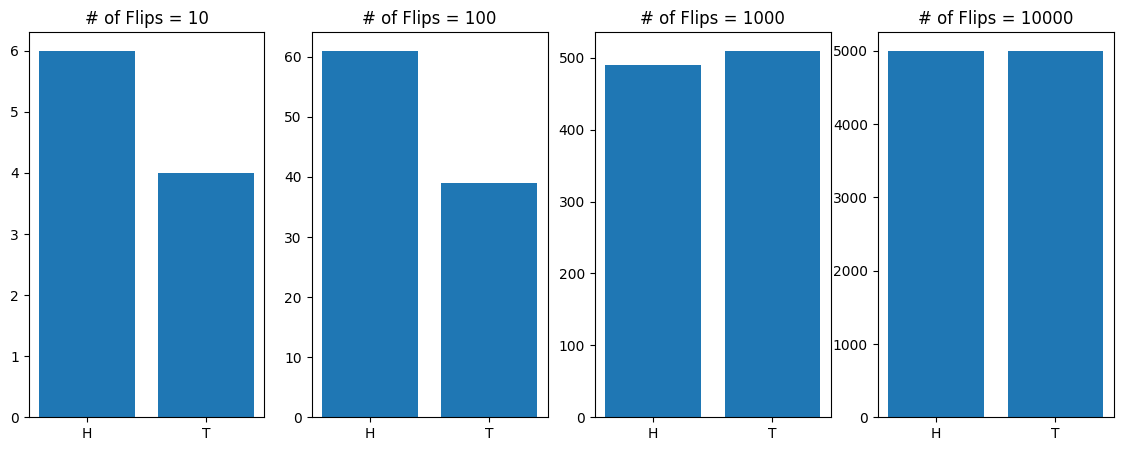

In [11]:
from scripts.part2.utils import flip
import matplotlib.pyplot as plt
import numpy as np

x = np.logspace(start=1, stop=4, num=4, dtype=int)

fig = plt.figure(figsize=(14,5), dpi=100)

for idx, numFlips in enumerate(x):
    numH, numT = flip(numFlips=numFlips)
    ax = fig.add_subplot(1, 4, idx+1)
    ax.bar(
        x=[0, 1],
        height=[numH, numT],
    )
    ax.set(
        title="# of Flips = {:d}".format(numFlips),
        xticks=[0, 1],
        xticklabels=["H", "T"],
    )

plt.show()

### Expectation and Variance

- Consider a random variable $X$. We would like to define its average, e.g., its **expected value** or **mean**. The expected value is defined as the weighted average of the values in the range. 

- Let $X$ be a discrete random variable with range $R_X = \{ x_1, x_2, x_3, ...\}$. The expected value of $X$, denoted by $\mathbb{E}[X]$, is defined as

$$
\mathbb{E}[X] = \sum_{x_k \in R_X} x_k \cdot P(X = x_k) = \sum_{x_k \in R_X} x_k \cdot P_X(x_k)
$$

- The variance of $X$, denoted by $\text{Var}(X)$, is defined as

$$
\text{Var}(X) = \mathbb{E} \big[ (X - \mu_X)^2 \big]
$$

- For a continuous random variable $X$,

$$
\begin{aligned}
\mathbb{E}[X] &= \int_{-\infty}^{\infty} x f_X(x) dx \\
\text{Var}(X) &= \mathbb{E} \big[ (X - \mu_X)^2 \big] \\
    &= \int_{-\infty}^{\infty} (x - \mu_X)^2 f_X(x) dx \\
    &= \int_{-\infty}^{\infty} x^2 f_X(x) dx - \mu_X^2 \\
    &= \mathbb{E}[X^2] - (\mathbb{E}[X])^2
\end{aligned}
$$

#### Properties of expectation and variance

1. Expectation is **linear**:

$$
\begin{aligned}
&\mathbb{E}[aX + b] = a \mathbb{E}[X] + b \text{, for all } a, b \in \Reals \\
&\mathbb{E}[X_1 + X_2 + \cdots + X_n] = \mathbb{E}[X_1] + \mathbb{E}[X_2] + \cdots + \mathbb{E}[X_n]
\end{aligned}
$$

2. Variance is **not linear**:

$$
\text{Var}(aX + b) = a^2 \text{Var}(X)
$$

3. If $X_1 + X_2 + \cdots + X_n$ are independent random variables and $X = X_1 + X_2 + \cdots + X_n$, then

$$
\text{Var}(X) = \text{Var}(X_1) + \text{Var}(X_2) + \cdots + \text{Var}(X_n)
$$


<a id="tag5"></a>

## **Distributions**

- Certain probability distributions appear so frequently in practice that they have been given special names. Each of these distributions is associated with a specific random experiment. Because these experiments effectively model many real-world phenomena, these distributions are widely used across various applications. For this reason, they are named and studied in detail. 

- In this section, we will present the probability mass functions (PMFs) for these special random variables. However, instead of simply memorizing the PMFs, it is more important to understand the underlying random experiments that give rise to them.

<a id="tag6"></a>

### Bernoulli Distribution

- A **Bernoulli random variable** is a random variable that can only take two possible values, usually $0$ and $1$. This random variable models random experiments that have two possible outcomes, sometimes referred to as "success" and "failure."

- For example:

    1. You bought a lottery ticket. You either win the prize (reuslting in $X = 1$) or fail ($X = 0$).
    2. You met a lovely girl and you invited her for a dinner. She accepted your invitation ($X = 1$) or rejected ($X = 0$).
    3. Series tied and today is the game 7. Your team wins ($X = 1$) the series or loses ($X = 0$).

- Formally, the **Bernoulli distribution** is defined as follows: A random variable $X$ is said to be a **Bernoulli** random variable with parameter $p$, shown as $X \sim Bernoulli (p)$, if its PMF is given by ($0 < p < 1$)

$$
P_X(x) = \begin{cases}
    p &\text{for } x = 1 \\
    1 - p &\text{for } x = 0 \\
    0 &\text{otherwise}
    \end{cases}.
$$

- Expectation and variance of $X \sim Bernoulli (p)$:

$$
\begin{aligned}
\mathbb{E}[X] &= p \\
\text{Var}(X) &= p \cdot (1-p)
\end{aligned}
$$

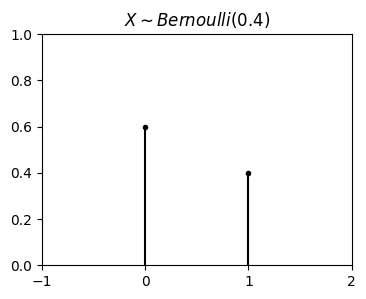

In [12]:
import matplotlib.pyplot as plt
import numpy as np

p = 0.4
fig = plt.figure(figsize=(4, 3), dpi=100)
ax = fig.add_subplot(111)
ax.plot([0, 1], [1-p, p], 'k.')
ax.vlines(
    x=[0,1],
    ymin=[0,0],
    ymax=[1-p,p],
    colors='k',
)
ax.set(
    title=r"$X \sim Bernoulli(0.4)$",
    xlim=[-1,2],
    xticks=np.linspace(-1,2,4),
    ylim=[0,1],
)

plt.show()

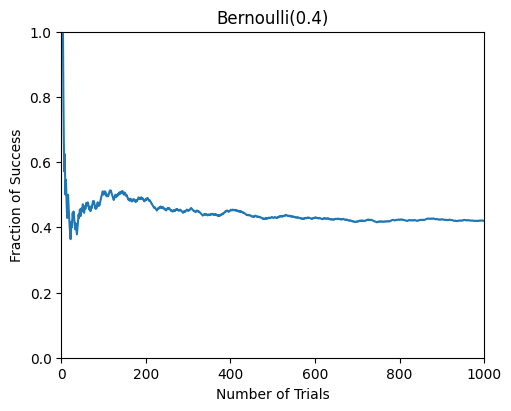

In [13]:
from scripts.part2.testFuncs import test2

test2(p=0.4)

<a id="tag7"></a>

### Geometric Distribution

- The random experiment behind the **geometric distribution** is as follows. Suppose that we have a coin with $P(Head) = p$. I toss the coin until we observe the first heads. We define $X$ as the total number of trials in this experiment. Then $X$ is said to have geometric distribution with parameter $p$. In other words, it is usually thought of as describing the number of independent Bernoulli attempts required to achieve a first success (or a first failure). In this case, the range of $X$ here is $R_X = \{1, 2, 3, ... \}$.

- For example: Looking at your past history, your chance of successfully getting a girl's contact information on the street is $20\%$. Then the distribution of getting the first girl's contact information after $k$ attempts will be **geometric distribution**. The mathematicall description for this case is:

$$
P_X(k) = P(X = k) = p \cdot (1-p)^{k-1} \text{, for } k = 1, 2, 3, ...
$$

- A random variable $X$ is said to be a **geometric** random variable with parameter $p$, shown as $X \sim Geometric (p)$, if its PMF is given by ($0 < p < 1$)

$$
P_X(k) = \begin{cases}
    p \cdot (1-p)^{k-1} &\text{for } k = 1, 2, 3, ... \\
    0 &\text{otherwise}
    \end{cases}.
$$

- Expectation and variance of $X \sim Geometric (p)$:

$$
\begin{aligned}
\mathbb{E}[X] &= \frac{1}{p} \\
\text{Var}(X) &= \frac{1-p}{p^2}
\end{aligned}
$$

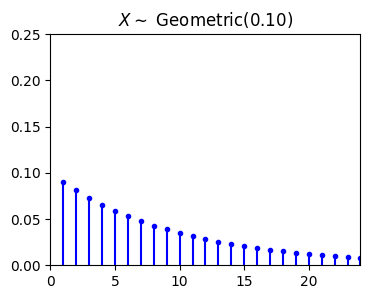

In [3]:
import matplotlib.pyplot as plt
import numpy as np

p = 0.1
k = np.arange(1, 25)
P_k = [p * (1-p)**(i) for i in k]

fig = plt.figure(figsize=(4, 3), dpi=100)
ax = fig.add_subplot(111)
ax.plot(k, P_k, 'b.')
ax.vlines(
    x=k,
    ymin=np.zeros_like(k),
    ymax=P_k,
    colors='b',
)
ax.set(
    title=r"$X \sim$" + " Geometric({:.2f})".format(p),
    xlim=[0, max(k)],
    ylim=[0, 0.25],
)

plt.show()

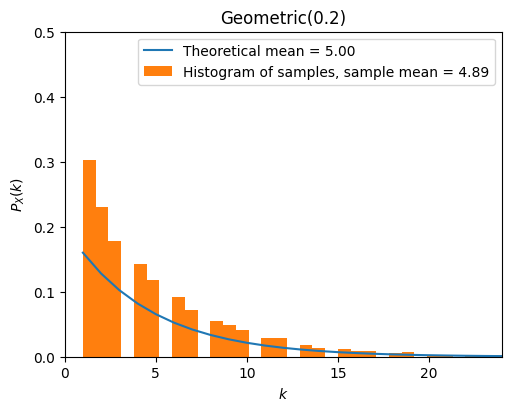

In [15]:
from scripts.part2.testFuncs import test3

test3(numTrials=5000, p=0.2)

### Exercise XXXX

- 假設成功要到聯絡資訊的機率是 $5 \%$，請問 OOO 平均要嘗試多少次才能拿到聯絡資訊？請寫一個程式來模擬這個事件

<a id="tag8"></a>

### Binomial Distribution

- The random experiment behind the **binomial distribution** is as follows. Suppose that we have a coin with $P(Head) = p$. I toss the coin $n$ times and define $X$ to be the total number of heads that we observe. Then $X$ is binomial with parameter $n$ and $p$, $X \sim Binomial(n,p)$. In this case, the range of $X$ here is $R_X = \{0, 1, 2, 3, ..., n\}$.

- A random variable $X$ is said to be a **binomial** random variable with parameter $n$ and $p$, shown as $X \sim Binomial(n,p)$, if its PMF is given by ($0 < p < 1$)

$$
P_X(k) = \begin{cases}
    \dbinom{n}{k} \cdot p^{k} \cdot (1-p)^{n-k} &\text{for } k = 0, 1, 2, 3, ..., n \\
    0 &\text{otherwise}
    \end{cases}.
$$

- Expectation and variance of $X \sim Binomial (n,p)$:

$$
\begin{aligned}
\mathbb{E}[X] &= n \cdot p \\
\text{Var}(X) &= n \cdot p \cdot (1-p)
\end{aligned}
$$

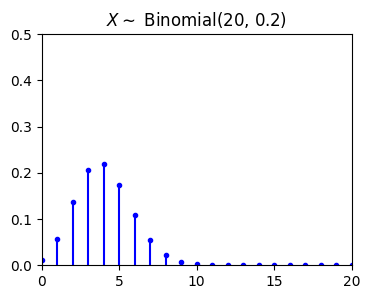

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scripts.part2.basicFuncs import binCoeff

p = 0.2
n = 20
k = np.arange(n+1)
P_k = [binCoeff(n=n, k=i) * p**i * (1-p)**(n-i) for i in k]

fig = plt.figure(figsize=(4, 3), dpi=100)
ax = fig.add_subplot(111)
ax.plot(k, P_k, 'b.')
ax.vlines(
    x=k,
    ymin=np.zeros_like(k),
    ymax=P_k,
    colors='b',
)
ax.set(
    title=r"$X \sim$" + " Binomial({:d}, {:.1f})".format(n, p),
    xlim=[0, max(k)],
    ylim=[0, 0.5],
)

plt.show()

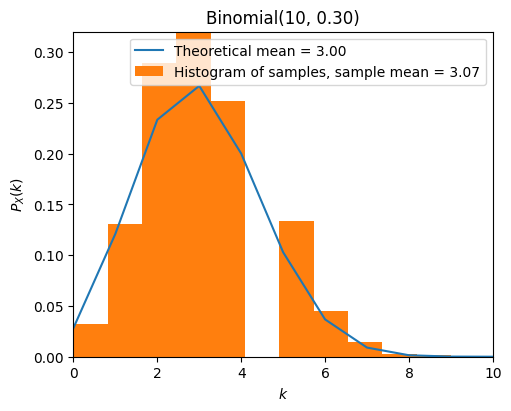

In [3]:
from scripts.part2.testFuncs import test4

test4(numTrials=1000, n=10, p=0.3)

### Exercise XXXX

- 請寫一個程式來模擬投擲一顆骰子10次出現4次6的機率分布狀況

<a id="tag9"></a>

### Pascal Distribution

- The **Pascal distribution** is a generalization of the geometric distribution. It relates to the random experiment of repeated independent trials until observing $m$ successes. Suppose that we have a coin with $P(Head) = p$. I toss the coin until we observe $m$ heads, where $m \in \natnums$. We define $X$ as the total number of trials in this experiment. Then $X$ is said to have Pascal distribution with parameter $m$ and $p$, $X \sim Pascal(m,p)$. In this case, the range of $X$ here is $R_X = \{m, m+1, m+2, m+3, ...\}$ and $Pascal(1, p) = Geometric(p)$.

- To derive the PMF of a $Pascal(m, p)$ random variable $X$. We can use this fact: 

    1. We observe $m-1$ heads in the first $k-1$ trials. We define the probability of this event is $P(B)$.
    2. We then observe a heads in the $k^{\text{th}}$ trial. We define the probability of this event is $P(C)$.
    3. Finally, the probability of observing $m$ heads in the first $k$ trials becomes $P(B) \cdot P(C)$.

$$
\begin{aligned}
P(B) &= \dbinom{k-1}{m-1} \cdot p^{m-1} \cdot (1-p)^{\big((k-1)-(m-1)\big)} \\
&= \dbinom{k-1}{m-1} \cdot p^{m-1} \cdot (1-p)^{k-m} \\
P(C) &= p
\end{aligned}
$$

- A random variable $X$ is said to be a **Pascal** random variable with parameter $m$ and $p$, shown as $X \sim Pascal(m,p)$, if its PMF is given by ($0 < p < 1$)

$$
P_X(k) = \begin{cases}
    \dbinom{k-1}{m-1} \cdot p^{m} \cdot (1-p)^{k-m} &\text{for } k = m, m+1, m+2, m+3, ... \\
    0 &\text{otherwise}
    \end{cases}.
$$

- Expectation and variance of $X \sim Pascal (m,p)$:

$$
\begin{aligned}
\mathbb{E}[X] &= \frac{m}{p} \\
\text{Var}(X) &= \frac{m \cdot (1-p)}{p^2}
\end{aligned}
$$


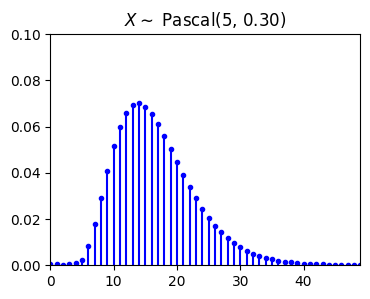

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scripts.part2.basicFuncs import binCoeff

p = 0.3
m = 5
k = np.arange(50)
P_k = [binCoeff(n=i-1, k=m-1) * p**m * (1-p)**(i-m) for i in k]

fig = plt.figure(figsize=(4, 3), dpi=100)
ax = fig.add_subplot(111)
ax.plot(k, P_k, 'b.')
ax.vlines(
    x=k,
    ymin=np.zeros_like(k),
    ymax=P_k,
    colors='b',
)
ax.set(
    title=r"$X \sim$" + " Pascal({:d}, {:.2f})".format(m, p),
    xlim=[0, max(k)],
    ylim=[0, 0.1],
)

plt.show()

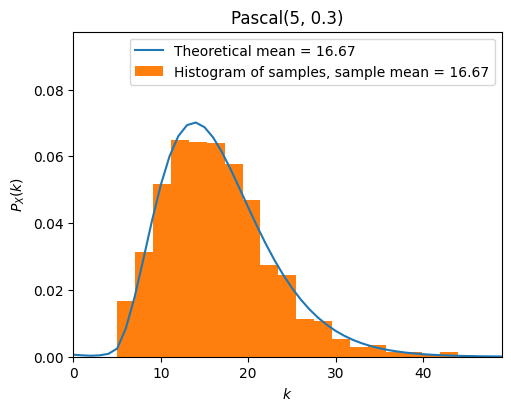

In [5]:
from scripts.part2.testFuncs import test5

test5(numTrials=1000, m=5, p=0.3)

<a id="tag10"></a>

### Poisson Distribution

- The **Poisson distribution** is one of the most widely used probability distributions. It is usually used in scenarios where we are counting the occurrences of certain events in an interval of time or space. Consider the following:

    1. In a short time interval $\Delta t$, the probability of an event occurring is proportional to $\Delta t$, i.e., $p = \lambda \Delta t$.
    2. The probability of it happening more than twice in a short period of time is negligible.
    3. In non-overlapping time periods, the number of times an event occurs is independent.

- Let $p$ represent the probability of an event occurring in a short time interval. Then the case of $k$ events occuring in a certain time interval (we can regard it as $n$ short time intervals, $n \Delta t$) follows the binomial distribution $X \sim Binomial(n, p = \lambda \Delta t)$, where $\lambda > 0$

- When $n \to \infty$, for any $k \in \{0, 1, 2, 3, ...\}$, we have

$$
\lim_{n \to \infty} P_X(k) = \frac{e^{-\lambda} \cdot \lambda^k}{k!}
$$

- A random variable $X$ is said to be a **Poisson** random variable with parameter $\lambda$, shown as $X \sim Poisson(\lambda)$, if its range is $R_X = \{0, 1, 2, 3, ...\}$, and its PMF is given by

$$
P_X(k) = \begin{cases}
    \frac{e^{-\lambda} \cdot \lambda^k}{k!} &\text{for } k \in R_X \\
    0 &\text{otherwise}
    \end{cases}.
$$

- Expectation and variance of $X \sim Poisson(\lambda)$:

$$
\begin{aligned}
\mathbb{E}[X] &= \lambda \\
\text{Var}(X) &= \lambda
\end{aligned}
$$


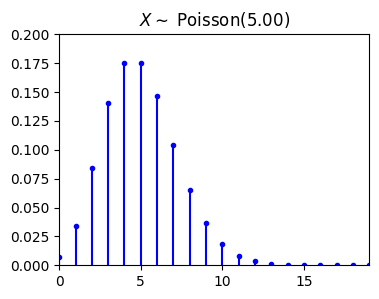

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scripts.part2.basicFuncs import factI


lamb = 5
k = np.arange(20)
P_k = [np.exp(-lamb)*lamb**i / factI(i) for i in k]

fig = plt.figure(figsize=(4, 3), dpi=100)
ax = fig.add_subplot(111)
ax.plot(k, P_k, 'b.')
ax.vlines(
    x=k,
    ymin=np.zeros_like(k),
    ymax=P_k,
    colors='b',
)
ax.set(
    title=r"$X \sim$" + " Poisson({:.2f})".format(lamb),
    xlim=[0, max(k)],
    ylim=[0, 0.2],
)

plt.show()

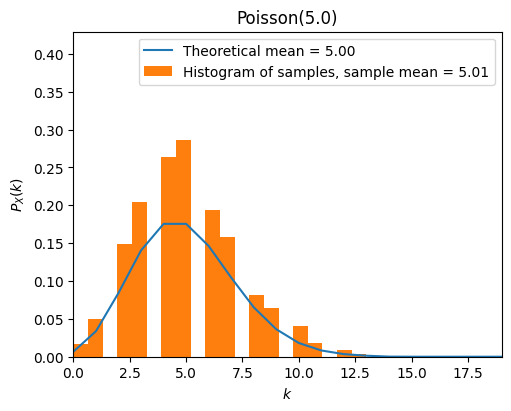

In [21]:
from scripts.part2.testFuncs import test6

test6(numTrials=1000, lamb=5)

<a id="tag11"></a>

### Uniform Distribution

- A continuous random variable $X$ is said to be an **Uniform** random variable over the interval $[a, b]$, shown as $X \sim Uniform(a, b)$, if its PDF is given by

$$
f_X(x) = \begin{cases}
    \frac{1}{b-a} & a < x < b \\
    0 & x < a \text{ or } x > b
    \end{cases}.
$$

- Expectation and variance of $X \sim Uniform(a, b)$:

$$
\begin{aligned}
\mathbb{E}[X] &= \frac{a+b}{2} \\
\text{Var}(X) &= \frac{(b-a)^2}{12}
\end{aligned}
$$


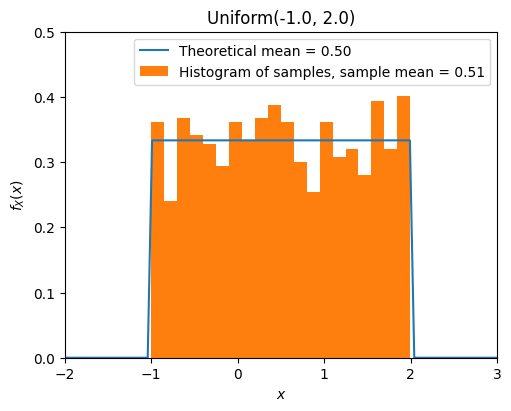

In [22]:
from scripts.part2.testFuncs import test7

test7(numTrials=1000, a=-1, b=2)

<a id="tag12"></a>

### Exponential Distribution

- A continuous random variable $X$ is said to be an **exponential** random variable with parameter $\lambda > 0$, shown as $X \sim Exponential(\lambda)$, if its PDF is given by

$$
f_X(x) = \begin{cases}
    \lambda e^{-\lambda x} & x > 0 \\
    0 & \text{otherwise}
    \end{cases}.
$$

- Expectation and variance of $X \sim Exponential(\lambda)$:

$$
\begin{aligned}
\mathbb{E}[X] &= \frac{1}{\lambda} \\
\text{Var}(X) &= \frac{1}{\lambda^2}
\end{aligned}
$$


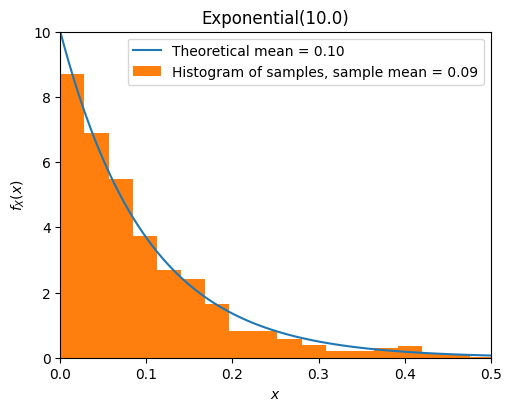

In [23]:
from scripts.part2.testFuncs import test8

test8(numTrials=1000, lamb=10)

<a id="tag13"></a>

### Normal Distribution (Gaussian)

- A continuous random variable $X$ is said to be a **normal** random variable with parameter $\mu$ and $\sigma$, shown as $X \sim N(\mu, \sigma)$, if its PDF is given by

$$
f_X(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{ \bigg[ -\frac{(x - \mu)^2}{2 \sigma^2} \bigg] }
$$

- Expectation and variance of $X \sim Exponential(\lambda)$:

$$
\begin{aligned}
\mathbb{E}[X] &= \mu \\
\text{Var}(X) &= \sigma^2
\end{aligned}
$$

- Special case: a continuous random variable $Z$ is said to be a **standard normal** random variable, shown as $Z \sim N(0, 1)$, if its PDF is given by

$$
f_Z(z) = \frac{1}{\sqrt{2 \pi}} \exp{ \bigg( -\frac{z^2}{2} \bigg) }
$$

- If $X \sim N(\mu_X, \sigma_X^2)$, and $Y = aX + b$, where $a, b \in \Reals$, then

$$
Y \sim N(\mu_Y, \sigma_Y^2) \text{, where} 
\begin{cases}
\mu_Y = a \mu_X + b \\
\sigma_Y^2 = a^2 \sigma_X^2
\end{cases}.
$$

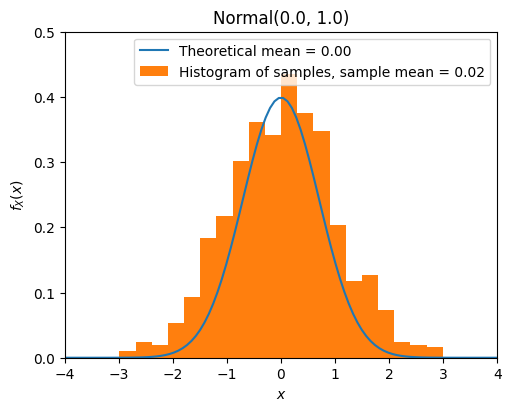

In [24]:
from scripts.part2.testFuncs import test9

test9(numTrials=1000, mu=0, sigma=1)

<a id="tag14"></a>

### Gamma Distribution

#### Gamma function

- The **gamma function** $\Gamma(x)$ is an extension of the factorial function to real (and complex) numbers. If $n \in \{1, 2, 3, ... \}$, then

$$
\Gamma(n) = (n-1)!
$$

- For any positive real number $\alpha$, 

$$
\Gamma(\alpha) = \int_0^{\infty} x^{\alpha - 1} e^{-x} \text{d}x.
$$

- Using the change of variable $x = \lambda y$, we can show the following equation that is often useful when working with the gamma distribution:

$$
\Gamma(\alpha) = \lambda^{\alpha} \int_0^{\infty} y^{\alpha - 1} e^{-\lambda y} \text{d}y \text{, for } \alpha, \lambda > 0.
$$

- Also, using integration by parts it can be shown that

$$
\Gamma(\alpha + 1) = \alpha \Gamma(\alpha) \text{, for } \alpha > 0.
$$

#### Properties of the gamma function

- For any positive real number $\alpha$:

    1. $\Gamma(\alpha) = \int_0^{\infty} x^{\alpha - 1} e^{-x} \text{d}x.$

    2. $\int_0^{\infty} x^{\alpha - 1} e^{- \lambda x} \text{d}x = \frac{\Gamma (\alpha)}{\lambda^{\alpha}}.$

    3. $\Gamma(\alpha + 1) = \alpha \Gamma(\alpha).$

    4. $\Gamma(n) = (n-1)!$, for $n = 1, 2, 3, ...$.

    5. $\Gamma(\frac{1}{2}) = \sqrt{\pi}.$

- - -

- A continuous random variable $X$ is said to be a **gamma** random variable with parameter $\alpha > 0$ and $\lambda > 0$, shown as $X \sim Gamma(\alpha, \lambda)$, if its PDF is given by

$$
f_X(x) = \begin{cases}
\frac{\lambda^{\alpha} x^{\alpha-1} e^{-\lambda x}}{\Gamma(\alpha)} & x > 0 \\
0 &\text{otherwise}
\end{cases}.
$$

- Expectation and variance of $X \sim Gamma(\alpha, \lambda)$:

$$
\begin{aligned}
\mathbb{E}[X] &= \frac{\alpha}{\lambda} \\
\text{Var}(X) &= \frac{\alpha}{\lambda^2}
\end{aligned}
$$

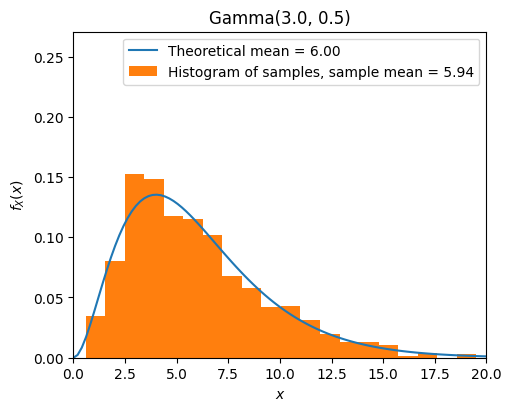

In [25]:
from scripts.part2.testFuncs import test10

test10(numTrials=1000, alpha=3, lamb=1/2)

### Summary of Mean and Variance

|Distribution|Mean $\big( \mu_X = \mathbb{E}[ X ] \big)$|Variance $\big( Var(X) = \mathbb{E} [ (X - \mu_X)^2 ] \big)$|
|:----------:|:----------------------------------------:|:----------------------------------------------------------:|
|$Bernoulli(p)$|$p$|$p \cdot (1-p)$|
|$Geometric(p)$|$\frac{1}{p}$|$\frac{1-p}{p^2}$|
|$Binomial(n, p)$|$n \cdot p$|$n \cdot p \cdot (1-p)$|
|$Pascal(m, p)$|$\frac{m}{p}$|$\frac{m \cdot (1-p)}{p^2}$|
|$Poisson(\lambda)$|$\lambda$|$\lambda$|
|$Uniform(a, b)$|$\frac{a+b}{2}$|$\frac{(b-a)^2}{12}$|
|$Exponential(\lambda)$|$\frac{1}{\lambda}$|$\frac{1}{\lambda^2}$|
|$Normal(\mu, \sigma)$|$\mu$|$\sigma^2$|
|$Gamma(\alpha, \lambda)$|$\frac{\alpha}{\lambda}$|$\frac{\alpha}{\lambda^2}$|